In [2]:
# Author: Dýrmundur Helgi
# Date: 24.8.2023
# Project: Assignment 1 - Decision Trees
# Acknowledgements: example.exclusive_interval
#


from typing import Union
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree

from tools import load_iris, split_train_test

In [3]:
# Part 1.1
def prior(targets: np.ndarray, classes: list) -> np.ndarray:
    '''
    Calculate the prior probability of each class type
    given a list of all targets and all class types
    '''
    probabilities = np.zeros(len(classes))
    
    for i, a_class in enumerate(classes):
        for target in targets:
            if target == a_class:
                probabilities[i] += 1
    return np.array(probabilities / len(targets))

#print(prior([0, 0, 1], [0, 1]))
#print(prior([0, 2, 3, 3], [0, 1, 2, 3]))


In [4]:
# Part 1.2
def split_data(
    features: np.ndarray,
    targets: np.ndarray,
    split_feature_index: int,
    theta: float
) -> Union[tuple, tuple]:
    '''
    Split a dataset and targets into two seperate datasets
    where data with split_feature < theta goes to 1 otherwise 2
    '''
    condition = features[:, split_feature_index] < theta
    
    features_1 = features[condition]
    targets_1 = targets[condition]

    features_2 = features[~condition]
    targets_2 = targets[~condition]

    return (features_1, targets_1), (features_2, targets_2)


#features, targets, classes = load_iris()
#(f_1, t_1), (f_2, t_2) = split_data(features, targets, 2, 4.65)
#print(len(f_1), len(f_2))


In [5]:
# Part 1.3
def gini_impurity(targets: np.ndarray, classes: list) -> float:
    '''
    Calculate:
        i(S_k) = 1/2 * (1 - sum_i P{C_i}**2)
    '''
    return 0.5 * (1 - np.sum(np.power(prior(targets, classes),2)))

#print(gini_impurity(t_1, classes))
#print(gini_impurity(t_2, classes))

In [6]:
# Part 1.4

def weighted_impurity(
    t1: np.ndarray,
    t2: np.ndarray,
    classes: list
) -> float:
    '''
    Given targets of two branches, return the weighted
    sum of gini branch impurities
    '''
    g1 = gini_impurity(t1, classes)
    g2 = gini_impurity(t2, classes)
    n = t1.shape[0] + t2.shape[0]
    
    return (t1.shape[0]*g1)/n + (t2.shape[0]*g2)/n

#print(weighted_impurity(t_1, t_2, classes))

In [7]:
# Part 1.5

def total_gini_impurity(
    features: np.ndarray,
    targets: np.ndarray,
    classes: list,
    split_feature_index: int,
    theta: float
) -> float:
    '''
    Calculate the gini impurity for a split on split_feature_index
    for a given dataset of features and targets.
    '''
    (f_1, t_1), (f_2, t_2) = split_data(features, targets, split_feature_index, theta)
    return weighted_impurity(t_1, t_2, classes)

#print(total_gini_impurity(features, targets, classes, 2, 4.65))

In [8]:
# Part 1.6
def brute_best_split(
    features: np.ndarray,
    targets: np.ndarray,
    classes: list,
    num_tries: int
) -> Union[float, int, float]:
    '''
    Find the best split for the given data. Test splitting
    on each feature dimension num_tries times.

    Return the lowest gini impurity, the feature dimension and
    the threshold
    '''
    best_gini, best_dim, best_theta = float("inf"), None, None
    for i in range(features.shape[1]):
        row = features[:,i]
        thetas = np.linspace(np.min(row), np.max(row),num_tries+2)[1:-1]
        for theta in thetas:
            gini = total_gini_impurity(features, targets, classes, i, theta)
            if gini < best_gini:
                best_gini = gini
                best_dim = i
                best_theta = theta
    return best_gini, best_dim, best_theta

#print(brute_best_split(features, targets, classes, 30))

The accuracy is: 0.9655172413793104


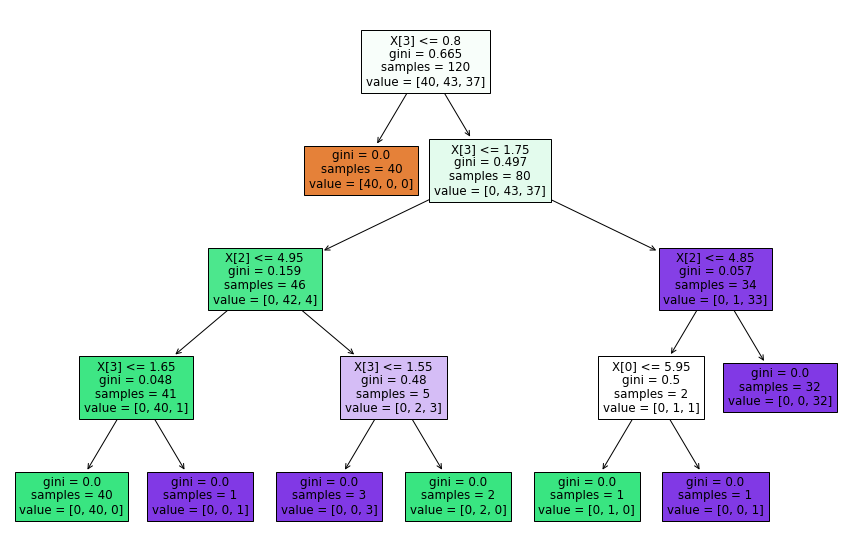

I guessed: [0 0 1 1 0 0 0 1 2 2 1 1 0 2 2 1 2 2 1 0 0 2 1 0 2 2 2 0 2]
The true targets are: [0 0 1 1 0 0 0 1 2 2 1 1 0 2 2 2 2 2 1 0 0 2 1 0 2 2 2 0 2]
[[10  0  0]
 [ 0  7  1]
 [ 0  0 11]]


In [9]:
class IrisTreeTrainer:
    def __init__(
        self,
        features: np.ndarray,
        targets: np.ndarray,
        classes: list = [0, 1, 2],
        train_ratio: float = 0.8
    ):
        '''
        train_ratio: The ratio of the Iris dataset that will
        be dedicated to training.
        '''
        (self.train_features, self.train_targets),\
            (self.test_features, self.test_targets) =\
            split_train_test(features, targets, train_ratio)

        self.classes = classes
        self.tree = DecisionTreeClassifier()

    # Part 2.1
    def train(self):
        self.tree.fit(self.train_features, self.train_targets)
    # Part 2.2
    def accuracy(self):
        return self.tree.score(self.test_features, self.test_targets)
    # Part 2.3
    def plot(self):
        plt.figure(figsize=(15,10))
        plot_tree(self.tree, filled=True)
        plt.savefig('2_3_1.png')
        plt.show()
    # Part 2.4
    def guess(self):
        return self.tree.predict(self.test_features)
    # Part 2.5
    def confusion_matrix(self):
        length = len(self.classes)
        self._confusion_matrix = np.zeros((length, length), dtype='int')
        guesses = self.guess()
        for i in range(len(guesses)):
            correct = self.test_targets[i]
            guess = guesses[i]
            self._confusion_matrix[guess][correct] += 1
            
        return self._confusion_matrix

if __name__ == '__main__':
    features, targets, classes = load_iris()
    dt = IrisTreeTrainer(features, targets, classes=classes)
    dt.train()
    print(f'The accuracy is: {dt.accuracy()}')
    dt.plot()
    print(f'I guessed: {dt.guess()}')
    print(f'The true targets are: {dt.test_targets}')
    print(dt.confusion_matrix())